# Local Region Integrations

In this notebook we want to investigate the expected behaviour of tracer amounts within local regions surrounding an injection point. For simplicity, we will consider the 2D-case and see how much tracer is located within a circle and a square of similar area, and how these sahpes are affected by a change of dimension.

The two main questions are
1. Will the square or the disc contain most solute at the initial injection?
1. Does the square or the disc retatin the initial amount for the longest time?

We start out by defining two regions
$$
\Omega_S(a) = \{(x, y) \in \mathbb{R}^2 \,|\, \max\{|x|, |y|\} < a\} \\
\Omega_C(r) = \{(x, y) \in \mathbb{R}^2 \,|\, x^2 + y^2 < r\}
$$
and define for some length scale $\sigma$, a gaussian function
$$
u_0(x, y) = exp(-\frac{x^2 + y^2}{2\sigma^2})
$$
which serves as the initial condition for the tracer concentration.

## Initial Solute Amounts 

The total amounts in the circle and square, are
$$
N_S(a) = \int_{\Omega_S(a)} exp(-\frac{x^2 + y^2}{2\sigma^2}) dx\,dy = \left(\int_{-a}^a exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx\right)^2 = 2\pi \sigma^2 erf\left(\frac{a}{\sqrt{2}\sigma}\right)^2\\
N_C(r) = \int_{\Omega_C(r)} exp(-\frac{r^2}{2\sigma^2})dx\,dy = 2\pi\int_0^r \rho\exp{\left(-\frac{\rho^2}{2\sigma^2}\right)} \,d\rho = 2\pi\sigma^2 \left(1 - \exp\left(-\frac{r^2}{2\sigma^2}\right)\right)
$$

Assuming that the square and circle have the same area, then 
$$
        (2a)^2 = \pi r^2 \iff a(r) = \sqrt{\pi/4} r \iff r(a) = \sqrt{4 / \pi} a
$$

In [1]:
using Plots
using SpecialFunctions

Ns(a, σ) = 2π*σ^2*erf(a / √(2)σ)^2
Nc(r, σ) = 2π*σ^2 * (1 - exp(-r^2/(2*σ^2)))
R(a) = √(4/π) * a
relative(a, σ) = Nc(R(a), σ) / Ns(a, σ)

function plot_init_amount_comparison(start, stop, σ)
    a = start:0.01:stop
    plot(a, Ns.(a, σ), label="Square", title="σ=$σ")
    plot!(a, Nc.(R.(a), σ), label="Circle")
end

plot_init_amount_comparison (generic function with 1 method)

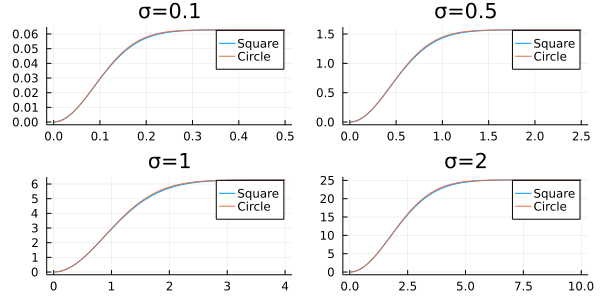

In [2]:
p1 = plot_init_amount_comparison(0, 0.5, 0.1)
p2 = plot_init_amount_comparison(0, 2.5, 0.5)
p3 = plot_init_amount_comparison(0, 4, 1)
p4 = plot_init_amount_comparison(0, 10, 2)
p = plot(p1, p2, p3, p4, layout=(2, 2), size=(600, 300))
display(p)

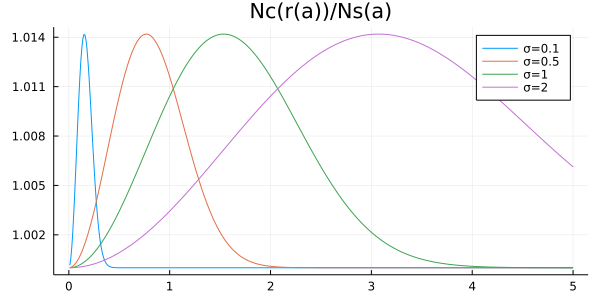

In [3]:
a = 0:0.01:5
plot(a, relative.(a, 0.1), label="σ=0.1", title="Nc(r(a))/Ns(a)", size=(600, 300))
plot!(a, relative.(a, 0.5), label="σ=0.5")
plot!(a, relative.(a, 1), label="σ=1")
plot!(a, relative.(a, 2), label="σ=2")

The top four figures shows the total tracer amounts within the two different regions, vs. $a$ (half the square side length), for different $\sigma$, representing varying spread of the initial distribution. The bottom figure shows the tracer amount within the circle, relative to the 

These figures show that there will only be a minor difference between the two regions, in the favour of the circular domain. In other words, these results do not correspond to the results from the rat brain diffusion. 

Two main suspects for this issue:
1. Technical issues.
2. Dimensional issues.
However, my intuitive reasoning for the circle having a larger concentration (the largest distance to points on the square are larger than the largest distance on a circle, points closer to the injection point will have larger concentration) will rather increase in higher dimension.

__NOTE: Have probably found the source of the difference. Missing the squared radius in the definition of the ball.__